# Star Wars Survey: Data Cleaning and Analysis

## Overview

While waiting for [Star Wars: The Force Awakens](https://en.wikipedia.org/wiki/Star_Wars:_The_Force_Awakens) to come out, the team at [FiveThirtyEight](https://fivethirtyeight.com/) suddenly developed an interest in answering several questions about *Star Wars* fans. Particularly, they pondered the question: **does the rest of America realise that "The Empire Strikes Back' is clearly the best of the bunch?**

The team was required to collect data addressing this question. In order to do so, they surveyed *Star Wars* fans using the online tool SurveyMonkey. They received 835 responses in total, which can downloaded as a dataset from [their GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

When reading the data into a pandas DataFrame, we have to specify an `encoding` in this case because the dataset contains some characters that are not in Python's default `utf-8` encoding.

In [1]:
import pandas as pd
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The data has several columns, including the following:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location` (Census Region) — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a `Yes` or `No` response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a `Yes` or `No` response

There are several other columns containing answers to questions about the Star Wars movies. For some questions, the respondent had to check one or more boxes. This type of data is difficult to represent in a column. As a result, this dataset needs a lot of cleaning.

## Cleaning and Mapping Columns

### Yes/No

We'll focus our attention on two of the columns now:
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?

Both represent `Yes/No` questions. They can also have `NaN` values where a respondent chooses not to answer a question.

Both columns are currently string types, because the main values they contain are `Yes` and `No`. We can make the data a bit easier to analyze later by converting each column to a Boolean with only the values `True`, `False`, and `NaN`. Booleans are easier to work with because we can select the rows that are `True` or `False` without having to do a string comparison.

In [4]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?']. value_counts()

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [5]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [6]:
yes_no = {
    'Yes': True,
    'No': False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

### Checkboxes

The next 6 columns represent a single checkbox question. In the survey, the respondent checked off a series of boxes in repsonse to the question: `Which of the following Star Wars films have you seen? Please select all that apply.`

The columns for this question are:
- `Which of the following Star Wars films have you seen? Please select all that apply.` — whether or not the respondent saw `Star Wars: Episode I The Phantom Menace`.
- `Unnamed: 4` — whether or not the respondent saw `Star Wars: Episode II Attack of the Clones`.
- `Unnamed: 5` — whether or not the respondent saw `Star Wars: Episode III Revenge of the Sith`.
- `Unnamed: 6` — whether or not the respondent saw `Star Wars: Episode IV A New Hope`.
- `Unnamed: 7` — whether or not the respondent saw `Star Wars: Episode V The Empire Strikes Back`.
- `Unnamed: 8` — whether or not the respondent saw `Star Wars: Episode VI Return of the Jedi`.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is `NaN`, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

We'll need to convert each of these columns to a Boolean, then rename the column something more intuitive. We can convert the values the same way we did earlier, except that we'll need to include the movie title and `NaN` in the mapping dictionary.

In [7]:
import numpy as np

movie_mapping = {
    'Star Wars: Episode I  The Phantom Menace': True,
    'Star Wars: Episode II  Attack of the Clones': True,
    'Star Wars: Episode III  Revenge of the Sith': True,
    'Star Wars: Episode IV  A New Hope': True,
    'Star Wars: Episode V The Empire Strikes Back': True,
    'Star Wars: Episode VI Return of the Jedi': True,
    np.nan: False
}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [8]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


Next, we'll have to rename the columns to reflect what they truly represent. For these columns, they represent whether or not the respondent has seen the movie.

In [9]:
renamed_movie_cols = {
    'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
    'Unnamed: 4': 'seen_2',
    'Unnamed: 5': 'seen_3',
    'Unnamed: 6': 'seen_4',
    'Unnamed: 7': 'seen_5',
    'Unnamed: 8': 'seen_6'
}

star_wars = star_wars.rename(columns=renamed_movie_cols)

In [10]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


### Rankings

The next six columns ask the respondent to rank the Star Wars movies in order from least to most favorite. `1` means the film was the most favorite, and `6` means it was the least favorite. Each of the following columns can contain the value `1`,`2`,`3`,`4`,`5`,`6`, or `NaN`:

- `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` - How much the respondent liked `Star Wars: Episode I The Phantom Menace`
- `Unnamed: 10` — How much the respondent liked `Star Wars: Episode II Attack of the Clones`
- `Unnamed: 11` — How much the respondent liked `Star Wars: Episode III Revenge of the Sith`
- `Unnamed: 12` — How much the respondent liked `Star Wars: Episode IV A New Hope`
- `Unnamed: 13` — How much the respondent liked `Star Wars: Episode V The Empire Strikes Back`
- `Unnamed: 14` — How much the respondent liked `Star Wars: Episode VI Return of the Jedi`

Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [11]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [12]:
renamed_rankings = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'ranking_1',
    'Unnamed: 10': 'ranking_2',
    'Unnamed: 11': 'ranking_3',
    'Unnamed: 12': 'ranking_4',
    'Unnamed: 13': 'ranking_5',
    'Unnamed: 14': 'ranking_6'
}

star_wars = star_wars.rename(columns=renamed_rankings)

In [13]:
star_wars.head(5)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Finding the Highest-Ranked Movie

Having cleaned up the ranking columns, it is now much easier to find the highest-ranked movie. To achieve this, we'll take the mean of each of the ranking columns using the `pandas.DataFrame.mean()` method on the DataFrames.

In [14]:
avg_rankings = star_wars[star_wars.columns[9:15]].mean()

In [15]:
avg_rankings.head(10)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

Now let's make a bar chart of each `ranking` column using `matplotlib` to visualise the results. Please note that a lower ranking is better in our case!

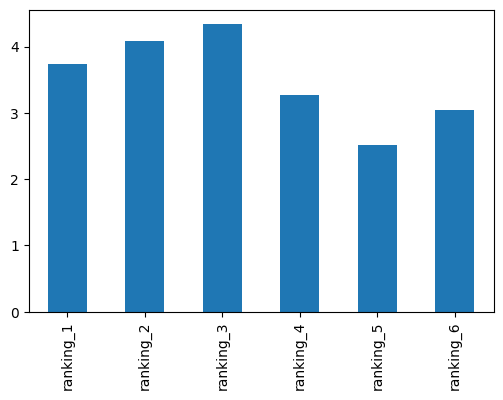

In [16]:
%matplotlib inline
avg_rankings.plot.bar()

From the plot, we seen that later movies in the Star Wars trilogy are generally rated more favourable by views.

## Finding the Most Viewed Movie

Earlier in this project, we cleaned up the `seen` columns and converted their values to the Boolean type. When we call methods like `pandas.DataFrame.sum()` or `mean()`, they treat Booleans like integers. They consider `True` a `1` and `False` a `0`. That means we can figure out how many people have seen each movie just by taking the sum of the column (even though they contain Boolean values).

In [17]:
total_seen = star_wars[star_wars.columns[3:9]].sum()

In [18]:
total_seen.head(10)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

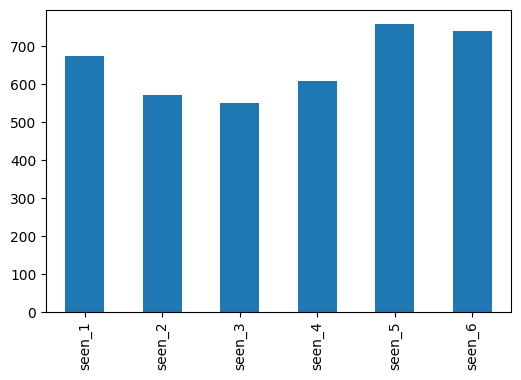

In [19]:
%matplotlib inline
total_seen.plot.bar()

From viewing the plots for both the rankings and the number of times each movie was watched, we see a clear correlation between the two types of fields in that the more popular ones tend to also have more views overall.

## Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survey population responded. There are several columns that segment our data into two groups. Here are a few examples:

- `Do you consider yourself to be a fan of the Star Wars film franchise?` — True or False
- `Do you consider yourself to be a fan of the Star Trek franchise?` — Yes or No
- `Gender` — Male or Female

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. The subsets will allow us to compute the most viewed movie, the highest-ranked movie, and other statistics separately for each group.

### Star Wars Fandom

In [21]:
star_wars_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
star_wars_non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [50]:
seen_sw_fan = star_wars_fan[star_wars_fan.columns[3:9]].sum()
most_viewed_sw_fan = seen_sw_fan.sort_values(ascending=False)
most_viewed_sw_fan

seen_5    538
seen_6    537
seen_1    500
seen_4    483
seen_2    463
seen_3    450
dtype: int64

In [51]:
seen_sw_non_fan = star_wars_non_fan[star_wars_non_fan.columns[3:9]].sum()
most_viewed_sw_non_fan = seen_sw_non_fan.sort_values(ascending=False)
most_viewed_sw_non_fan

seen_5    220
seen_6    201
seen_1    173
seen_4    124
seen_2    108
seen_3    100
dtype: int64

In [53]:
ranking_sw_fan = star_wars_fan[star_wars_fan.columns[9:15]].mean()
highest_ranked_sw_fan = ranking_sw_fan.sort_values()
highest_ranked_sw_fan

ranking_5    2.333333
ranking_6    2.829710
ranking_4    2.932971
ranking_1    4.141304
ranking_2    4.342391
ranking_3    4.417423
dtype: float64

In [54]:
ranking_sw_non_fan = star_wars_non_fan[star_wars_non_fan.columns[9:15]].mean()
highest_ranked_sw_non_fan = ranking_sw_non_fan.sort_values()
highest_ranked_sw_non_fan

ranking_5    2.862676
ranking_1    2.936396
ranking_6    3.471831
ranking_2    3.591549
ranking_4    3.933099
ranking_3    4.193662
dtype: float64

The fifth Star Wars movie (i.e: The Empire Strikes Back) is the both the most popular and highly lauded, regardless of whether or not one is actually a fan of the film franchise. However, there are generally much more views overall from fans, unsurprisingly.

### Star Trek Fandom

In [58]:
star_trek_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
star_trek_non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

In [59]:
seen_st_fan = star_trek_fan[star_trek_fan.columns[3:9]].sum()
most_viewed_st_fan = seen_st_fan.sort_values(ascending=False)
most_viewed_st_fan

seen_5    397
seen_6    396
seen_1    364
seen_4    342
seen_2    336
seen_3    322
dtype: int64

In [60]:
seen_st_non_fan = star_trek_non_fan[star_trek_non_fan.columns[3:9]].sum()
most_viewed_non_st_fan = seen_st_non_fan.sort_values(ascending=False)
most_viewed_non_st_fan

seen_5    353
seen_6    334
seen_1    301
seen_4    258
seen_2    228
seen_3    221
dtype: int64

We observe that each movie in the Star Wars franchise has been viewed more times by Star Trek fans compared to its non-fans. This indicates that those who consider themselves fans of Star Trek are also likely to be Star Wars fans, which is not surprisingly considering both franchises are part of the same genre with a similar narrative.